Ocilador amortiguado para el caso cuando \gamma < \omega_0

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop, Adam

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
class ODEsolver(Sequential):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")

    @property
    def metrics(self):
        return [self.loss_tracker]

    def train_step(self, data):
        batch_size = tf.shape(data)[0]
        x = tf.random.uniform((batch_size, 1), minval=0, maxval=5)  # Cambio de t a x, ajuste de rango de valores iniciales
        x_0 = tf.zeros((batch_size,1))
        
        with tf.GradientTape() as tape:
            # Cálculo de la pérdida y los gradientes
            with tf.GradientTape(persistent=True) as tape1:
                tape1.watch(x)
                tape1.watch(x_0)

                with tf.GradientTape() as tape2:
                    tape2.watch(x)    
                    y_pred = self(x, training=True)
                y_x = tape2.gradient(y_pred, x)
                y_0 = self(x_0, training=True)
            
            ddy = tape1.gradient(y_x, x)
            dy_x0 = tape1.gradient(y_0, x_0)
            eq = ddy + 2*y_x + 4*y_pred  # Ajuste de la ecuación diferencial
            ic = y_0 - 5.0  # Ajuste de la condición inicial y(0)
            ic1 = dy_x0  # Ajuste de la condición inicial y'(0)
            loss = keras.losses.mean_squared_error(0., eq) + keras.losses.mean_squared_error(0., ic) + keras.losses.mean_squared_error(0., ic1)

        # Aplicar gradientes
        grads = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        # Actualizar métricas
        self.loss_tracker.update_state(loss)
        # Devolver un diccionario que mapea nombres de métricas a valores actuales
        return {"loss": self.loss_tracker.result()}

In [7]:
model = ODEsolver()
model.add(Dense(10, activation='tanh', input_shape=(1,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))

model.add(Dense(1, activation='linear'))

In [8]:
model.summary()

Model: "od_esolver_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,461 (5.71 KB)

 Trainable params: 1,461 (5.71 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer=RMSprop(), metrics=['loss'])

x = tf.linspace(0, 5, 150)  # Ajusta el rango de tiempo
history = model.fit(x, epochs=150, verbose=1)

x_testv = tf.linspace(0,5, 150)  # Ajusta el rango de tiempo
a = model.predict(x_testv)

Epoch 1/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - loss: 2.7316 
Epoch 2/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5530  
Epoch 3/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2713  
Epoch 4/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3512  
Epoch 5/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2841  
Epoch 6/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5770  
Epoch 7/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6427 
Epoch 8/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4482  
Epoch 9/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9724
Epoch 10/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3275  
Epoch 11/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4113
Epoch 12/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6839 
Epoch 13/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5957
Epoch 14/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3578 
Epoch 15/150
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6751  
Epoch 16/

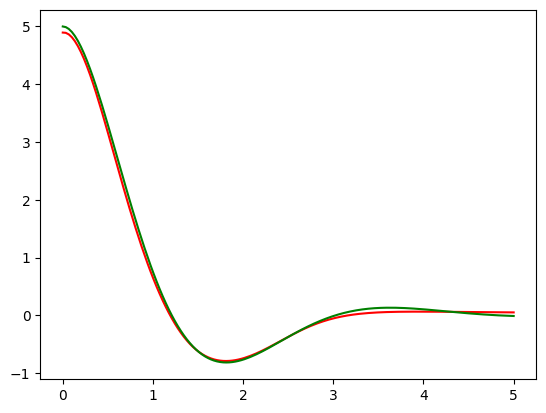

In [15]:
plt.plot(x_testv, a, color='red')
plt.plot(x_testv, 5*np.e**(-x)* ((1/np.sqrt(3))*np.sin(np.sqrt(3)*x)+ np.cos(np.sqrt(3)*x)), color = 'green')
plt.show()